### Amazinum
- Task 8
- Decision Trees
- Moisei
- CLF with DT, RFT, GBDT, XGBoost

In [203]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
import graphviz
from sklearn.model_selection import train_test_split

#### Load breast cancer dataset

In [204]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
print ('labels:',labels)
print ('features:', features)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

labels: ['malignant' 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### DecisionTree

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [206]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
max_depth = 5
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
#Visualize DT
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

train accuracy= 99.296%
test accuracy= 95.105%


'Source.gv.pdf'

#### Feature importance

<IPython.core.display.Javascript object>


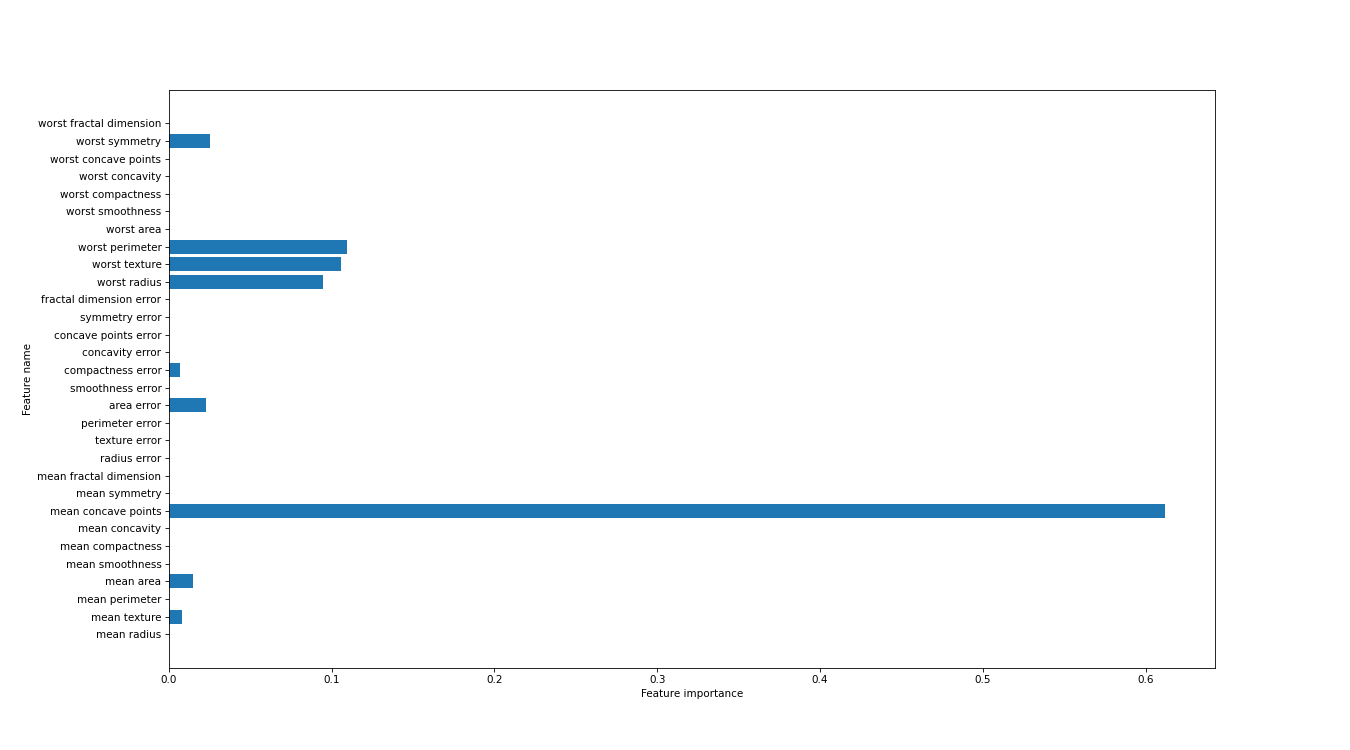

In [207]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(18, 10), dpi=50)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)
    
plot_feature_importances(clf, features)

#### RandomForest

In [208]:
from sklearn.ensemble import RandomForestClassifier

train accuracy= 99.531%
test accuracy= 97.203%


<IPython.core.display.Javascript object>


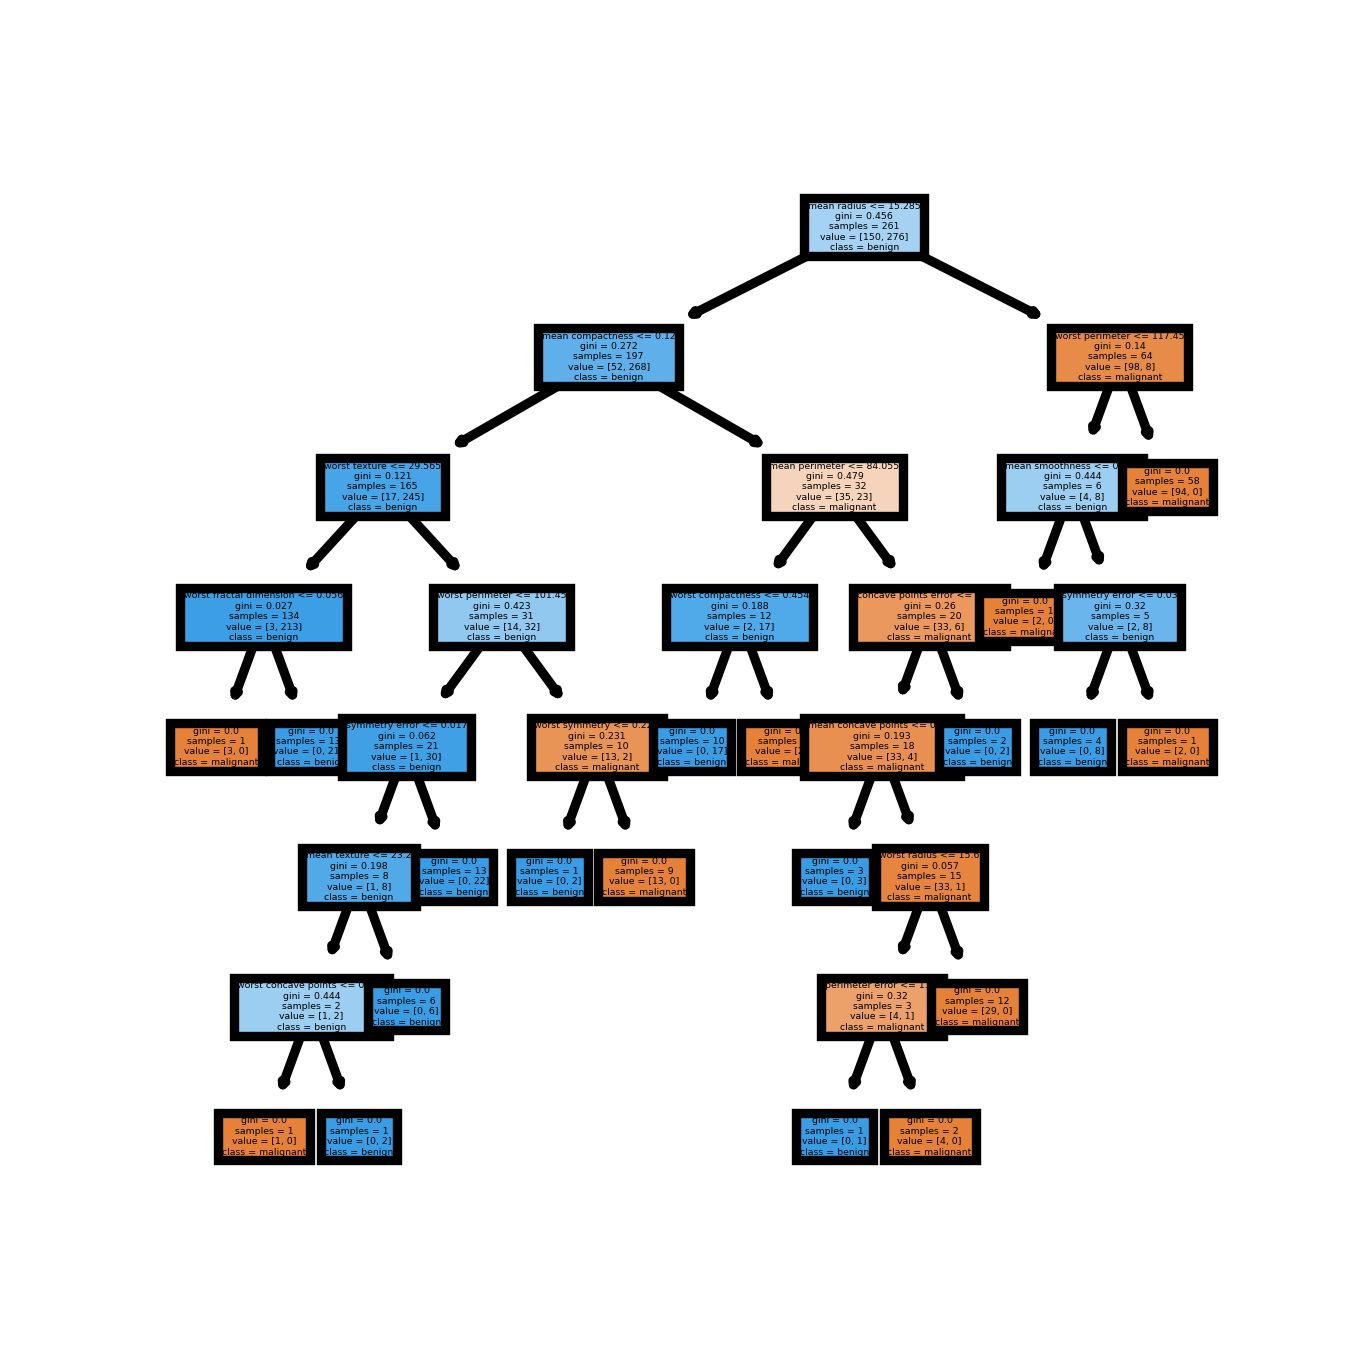

[Text(0.6647727272727273, 0.9375, 'mean radius <= 15.285\ngini = 0.456\nsamples = 261\nvalue = [150, 276]\nclass = benign'),
 Text(0.42045454545454547, 0.8125, 'mean compactness <= 0.12\ngini = 0.272\nsamples = 197\nvalue = [52, 268]\nclass = benign'),
 Text(0.20454545454545456, 0.6875, 'worst texture <= 29.565\ngini = 0.121\nsamples = 165\nvalue = [17, 245]\nclass = benign'),
 Text(0.09090909090909091, 0.5625, 'worst fractal dimension <= 0.056\ngini = 0.027\nsamples = 134\nvalue = [3, 213]\nclass = benign'),
 Text(0.045454545454545456, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [3, 0]\nclass = malignant'),
 Text(0.13636363636363635, 0.4375, 'gini = 0.0\nsamples = 133\nvalue = [0, 213]\nclass = benign'),
 Text(0.3181818181818182, 0.5625, 'worst perimeter <= 101.45\ngini = 0.423\nsamples = 31\nvalue = [14, 32]\nclass = benign'),
 Text(0.22727272727272727, 0.4375, 'symmetry error <= 0.017\ngini = 0.062\nsamples = 21\nvalue = [1, 30]\nclass = benign'),
 Text(0.18181818181818182, 0.3125, 'm

In [209]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf = RandomForestClassifier().fit (X_train, y_train)
clf.score (X_train, y_train)
n_estimators_list= [2,4,8,10,12,14,16,18,20]

for i in range (len(n_estimators_list)):    
    clf = RandomForestClassifier(
        random_state=10,
        n_estimators= n_estimators_list[i],       
    ).fit(X_train, y_train)
        
    accuracy_train = clf.score (X_train, y_train)
    accuracy_test = clf.score (X_test, y_test)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
#Visualize RFT
fn=cancer.feature_names
cn=cancer.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=450)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)

#### Feature importance

<IPython.core.display.Javascript object>


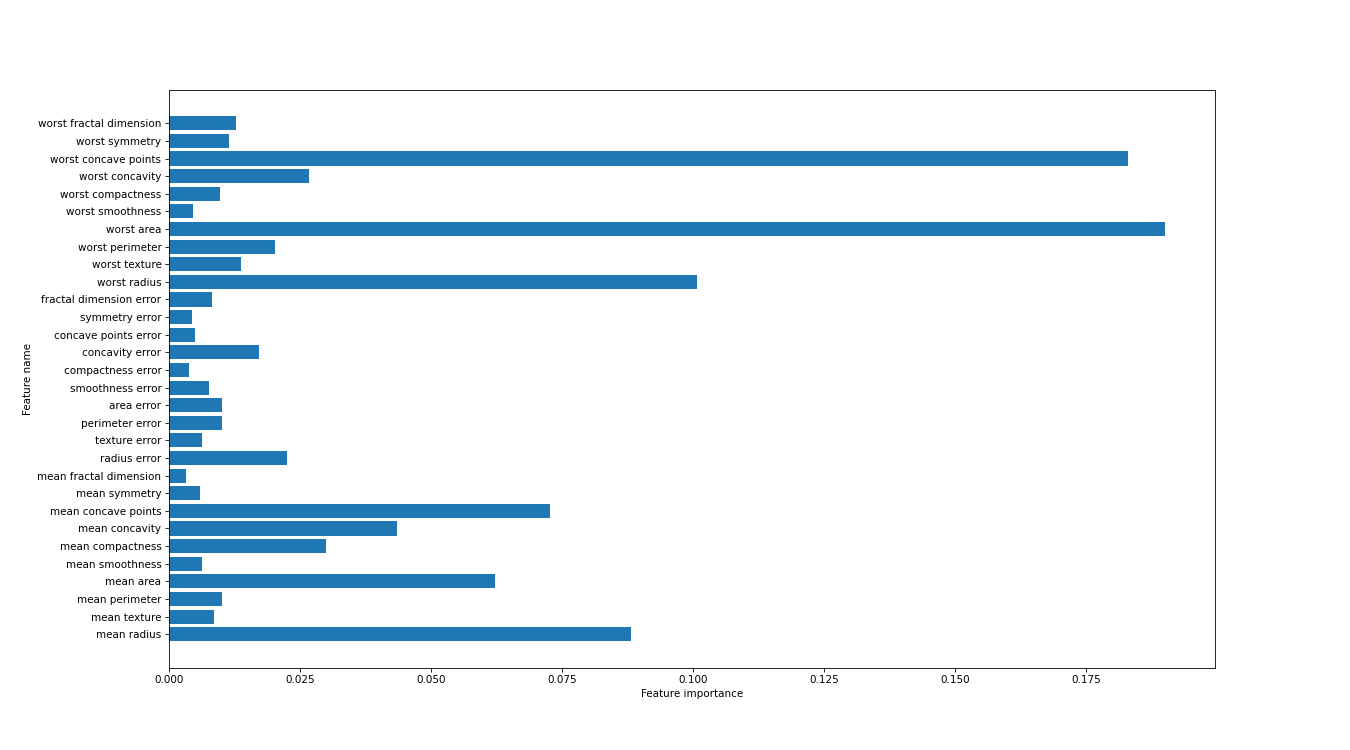

In [210]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(18, 10), dpi=50)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)
    
plot_feature_importances(clf, features)

#### Trying to show different accuracy for different numbers of features.

In [211]:
max_features_list = [20,18,16,14,12,10,8,4,2]    
for i, max_features in enumerate(max_features_list):
    clf = RandomForestClassifier(
        random_state=10,        
        max_features= max_features,    
    ).fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
    print ('max_features = {}:\n\t accuracy_train = {:.3%}\n\t accuracy_test = {:.3%}'.format (
        max_features_list[i], accuracy_train, accuracy_test))

max_features = 20:
	 accuracy_train = 100.000%
	 accuracy_test = 97.902%
max_features = 18:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 16:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 14:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 12:
	 accuracy_train = 100.000%
	 accuracy_test = 96.503%
max_features = 10:
	 accuracy_train = 100.000%
	 accuracy_test = 96.503%
max_features = 8:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 4:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 2:
	 accuracy_train = 100.000%
	 accuracy_test = 95.804%


#### Gradient Boosting Decision Trees (GBDT)

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

train accuracy= 97.418%
test accuracy= 96.503%


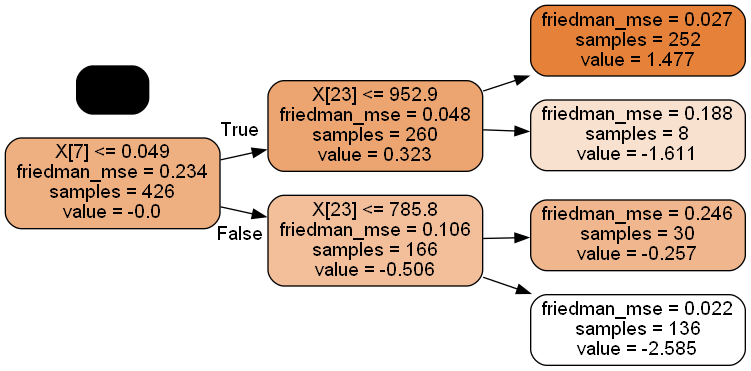

In [213]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=2)
clf.fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
# #Visualize GBClassifier
dt = clf.estimators_[0][0]
from six import StringIO
dot_data = StringIO()
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file=dot_data, 
                rounded = True,
                rotate = True,
                filled = True)
import pydot
from IPython.display import Image
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#### Feature importance

<IPython.core.display.Javascript object>


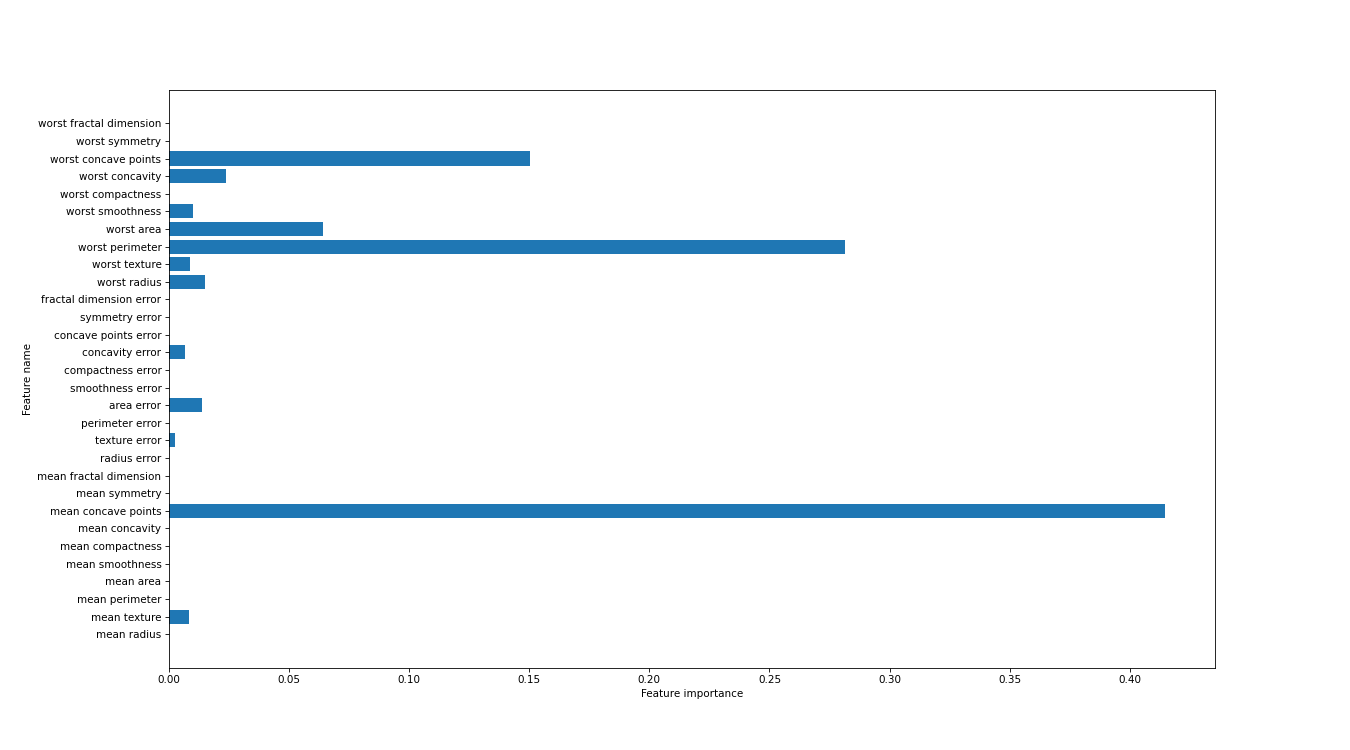

In [214]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(18, 10), dpi=50)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)
    
plot_feature_importances(clf, features)

#### XGBoost

In [215]:
from xgboost import XGBClassifier

train accuracy= 97.418%
test accuracy= 96.503%


<IPython.core.display.Javascript object>


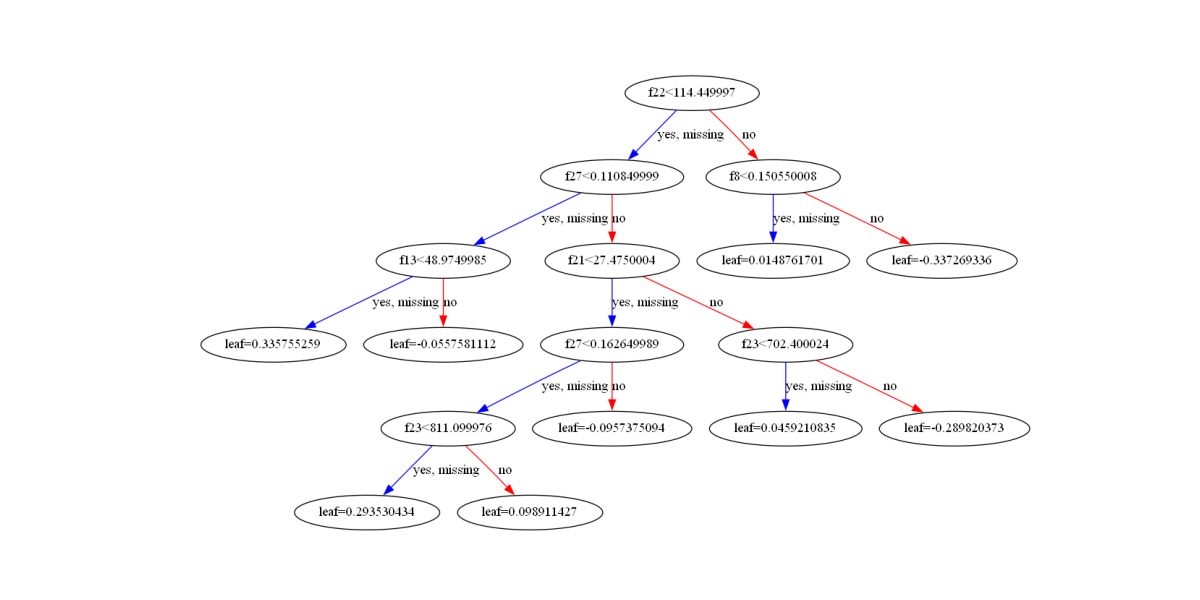

In [216]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf_xgboost = XGBClassifier(use_label_encoder=False, eval_metric= 'logloss')
clf_xgboost.fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
#Visualize XGBC
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(8, 4))
plot_tree(clf_xgboost, num_trees=4, ax=ax)
plt.show()

#### Feature importance

<IPython.core.display.Javascript object>


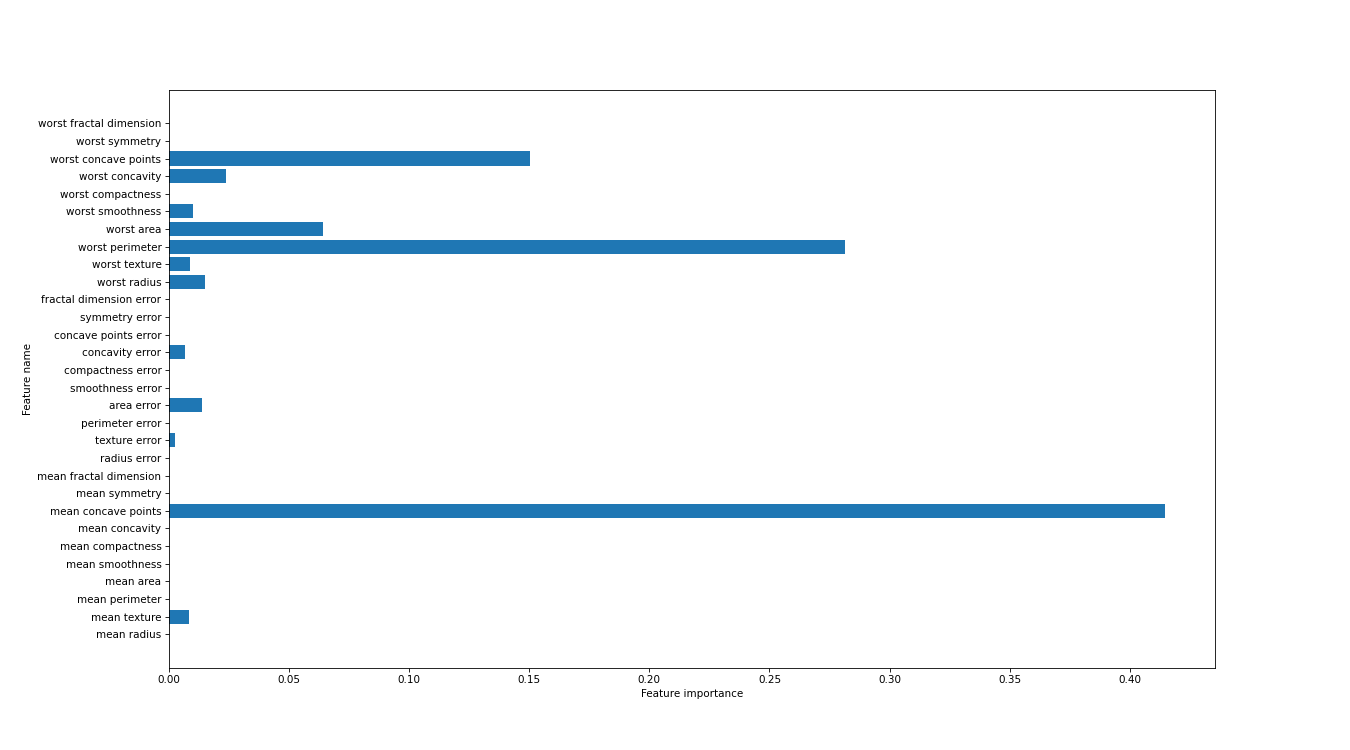

In [217]:
def plot_feature_importances(clf_xgboost, features):
    plt.figure(figsize=(18, 10), dpi=50)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)
    
plot_feature_importances(clf_xgboost, features)